In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix 


# Data pre-processing

school


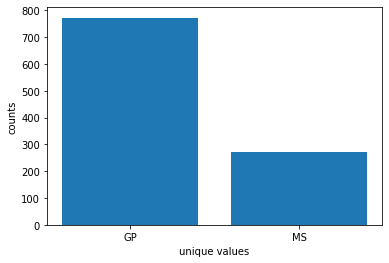

sex


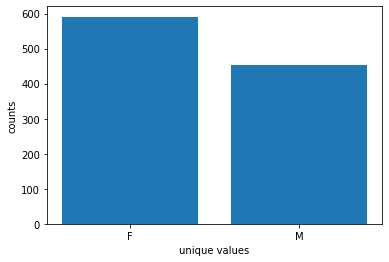

age


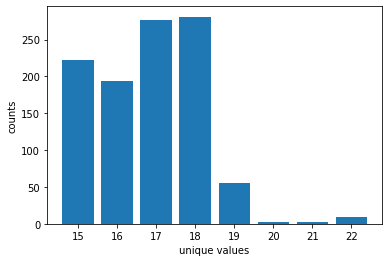

address


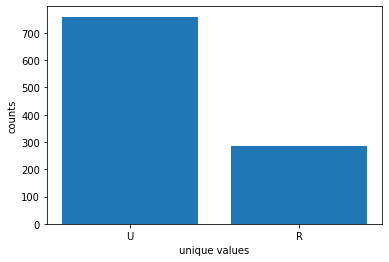

famsize


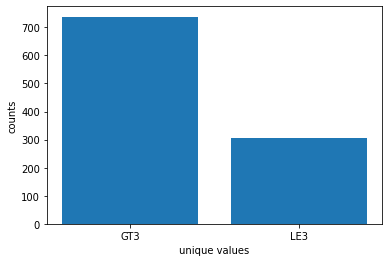

Pstatus


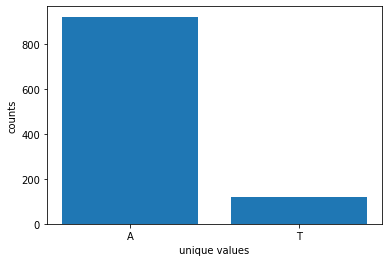

Medu


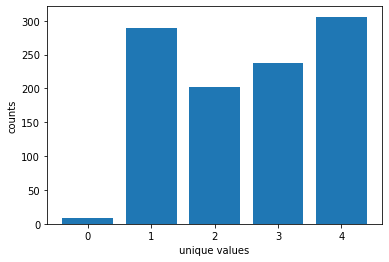

Fedu


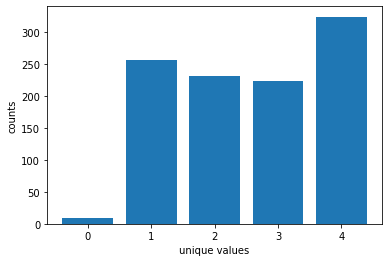

Mjob


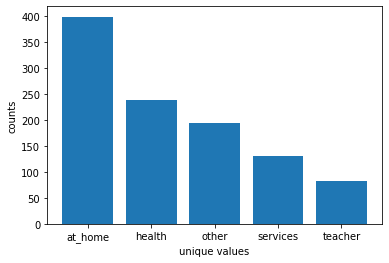

Fjob


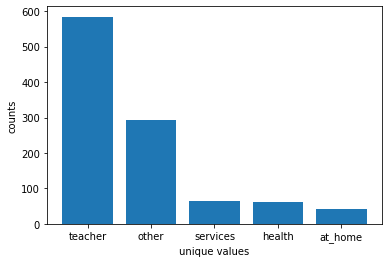

reason


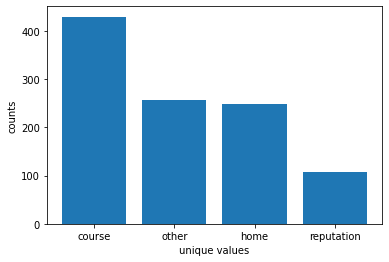

guardian


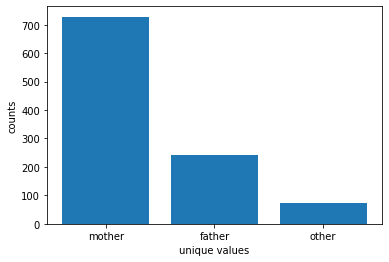

traveltime


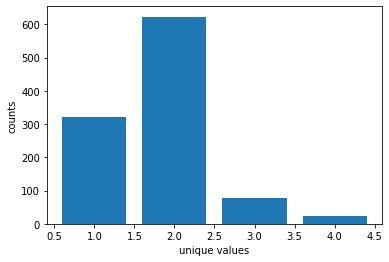

studytime


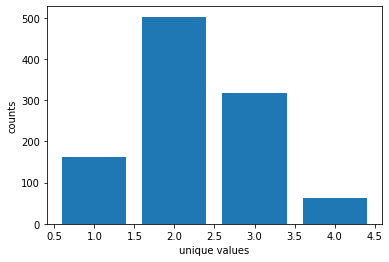

failures


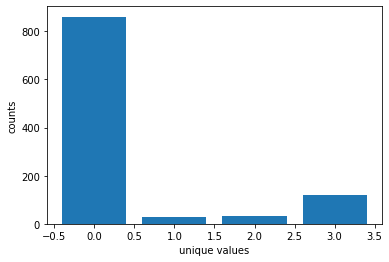

schoolsup


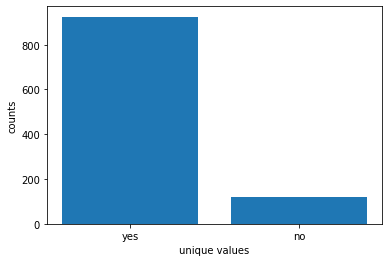

famsup


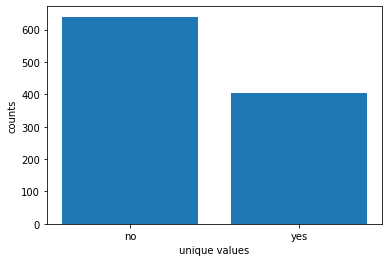

paid


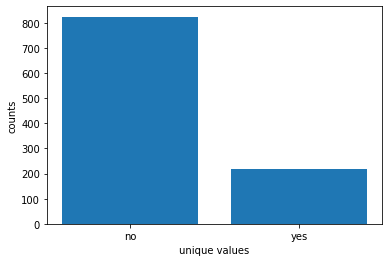

activities


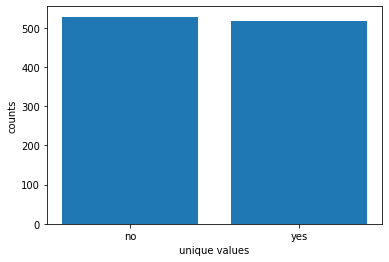

nursery


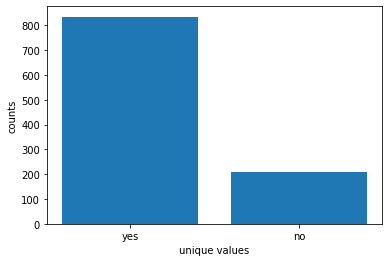

higher


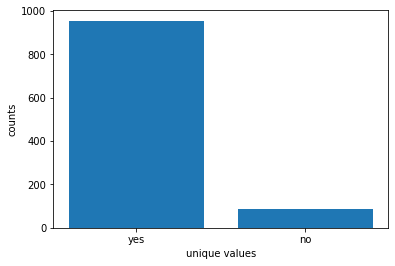

internet


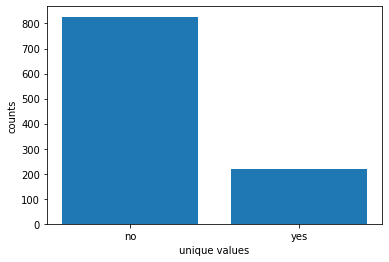

romantic


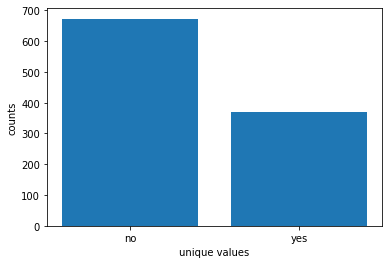

famrel


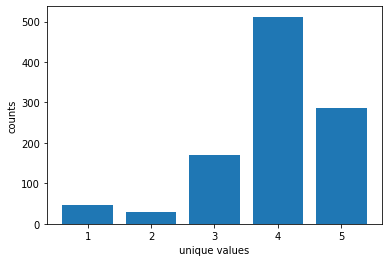

freetime


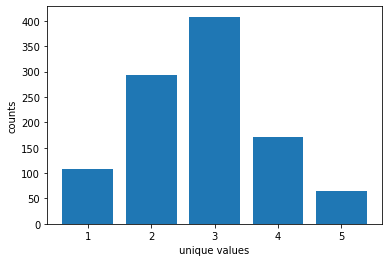

goout


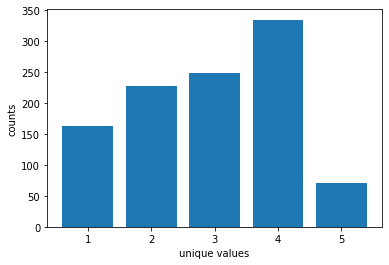

Dalc


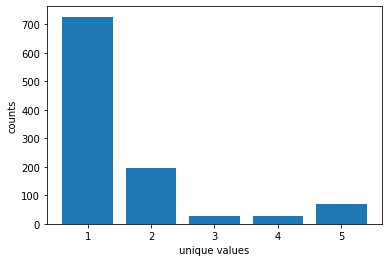

Walc


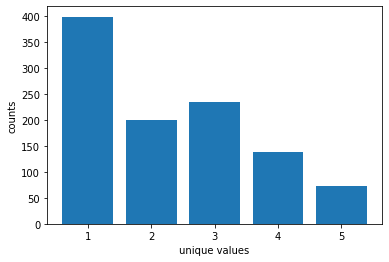

health


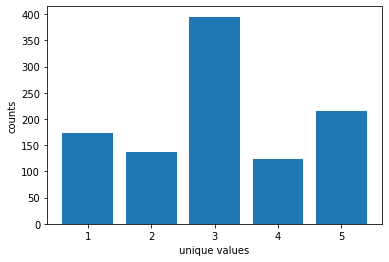

absences


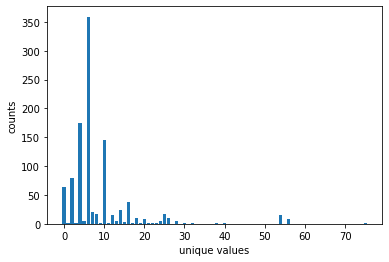

G1


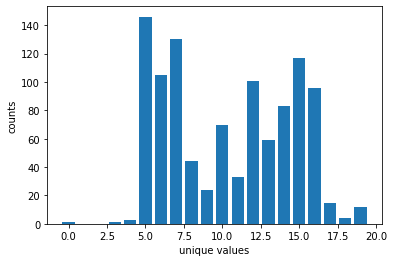

G2


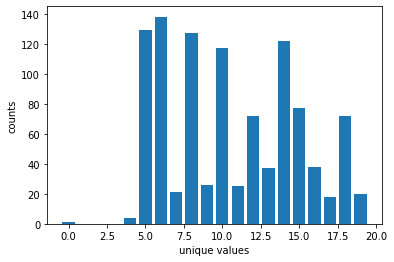

G3


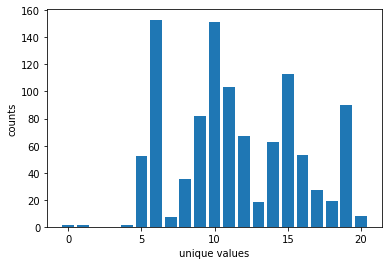

/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

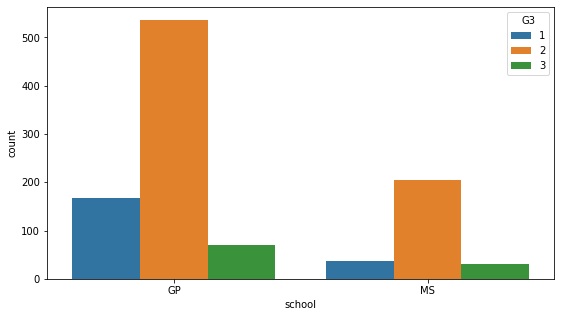

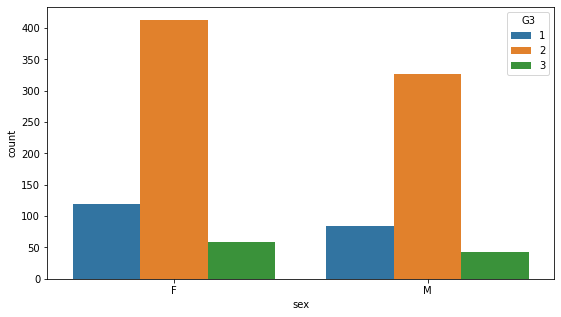

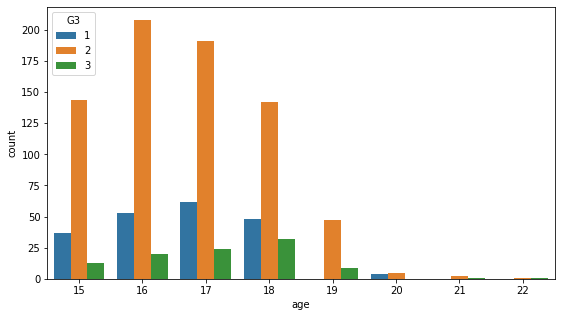

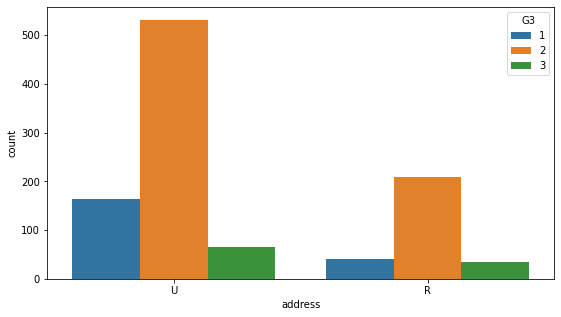

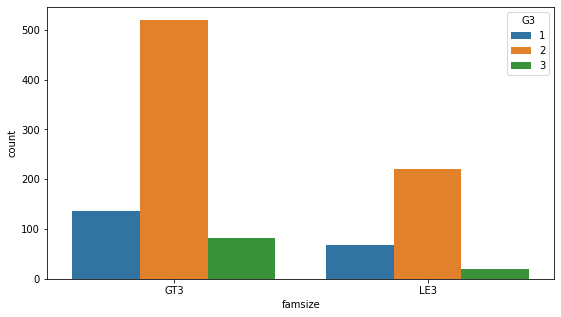

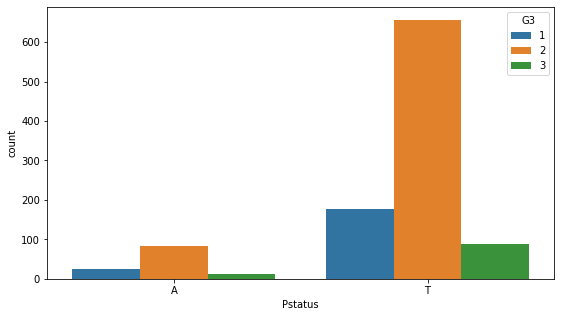

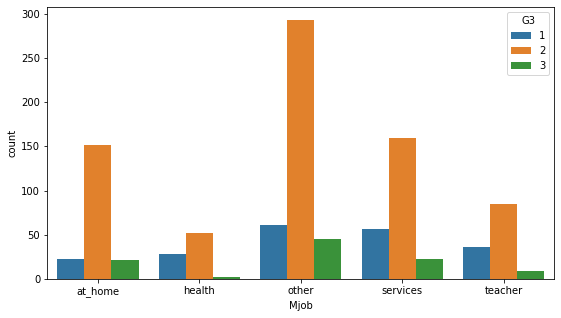

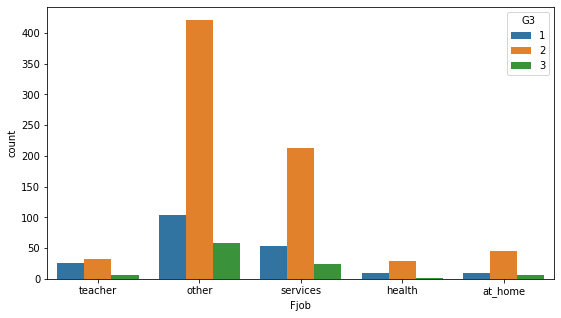

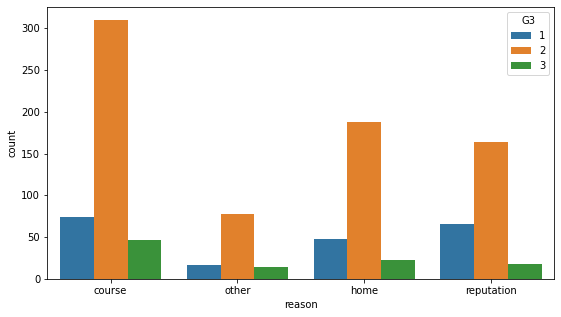

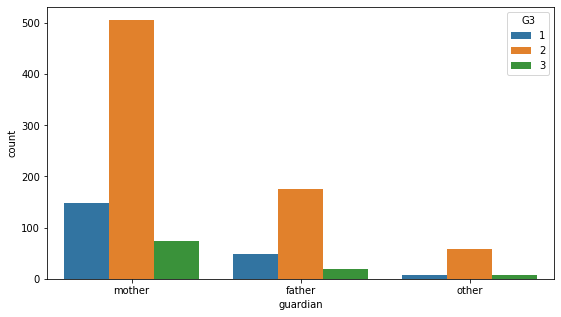

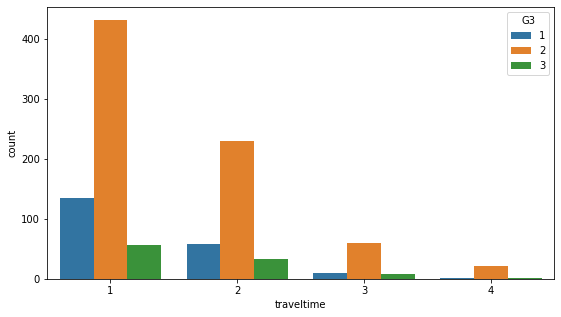

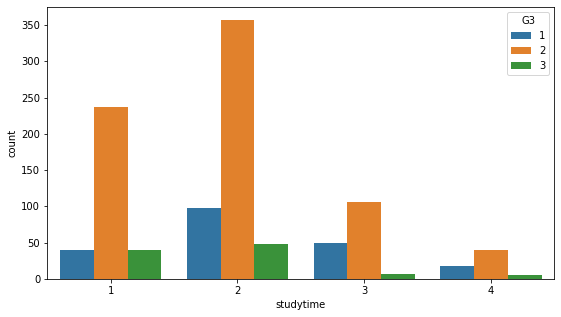

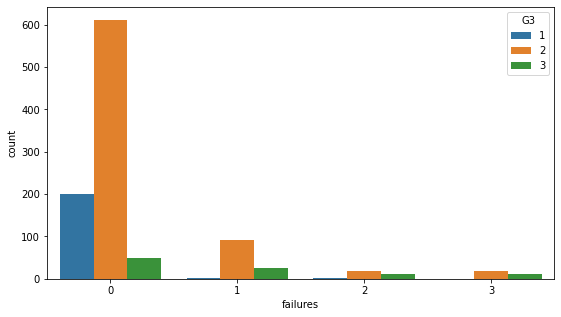

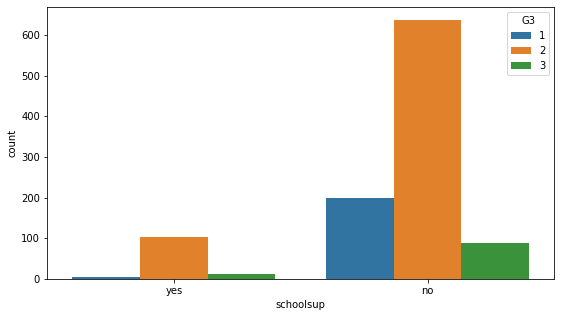

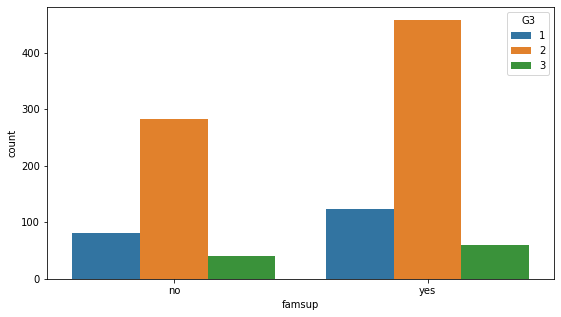

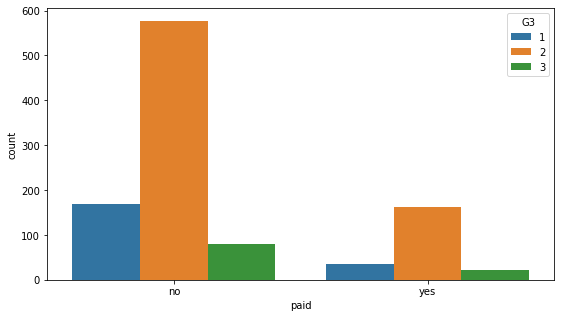

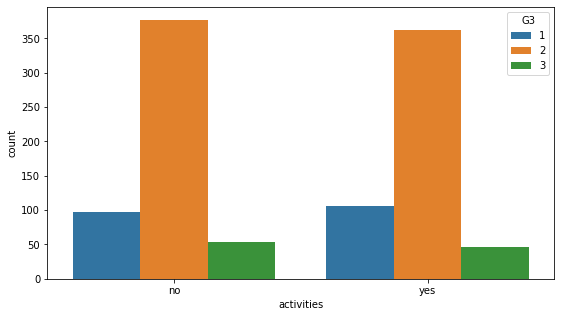

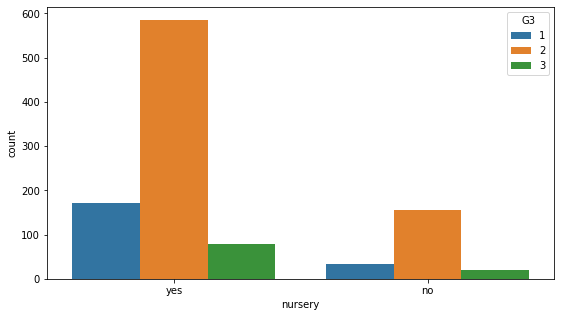

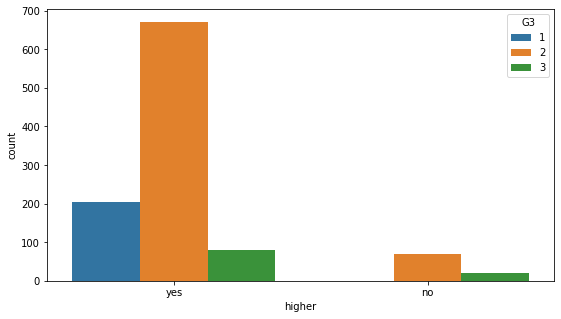

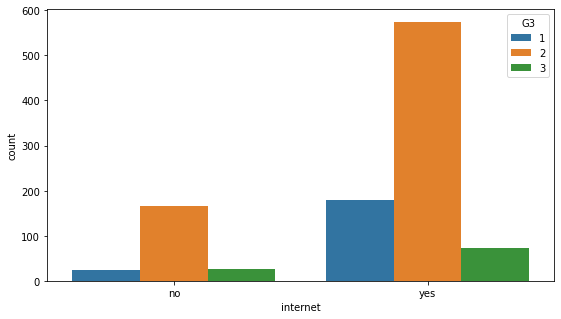

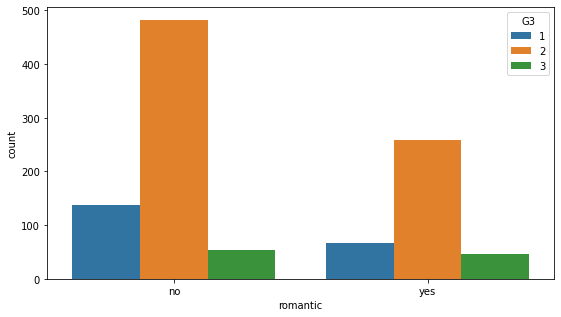

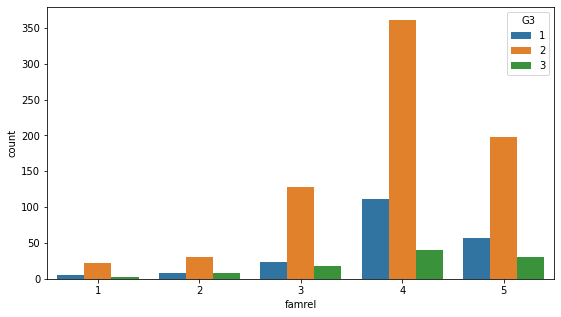

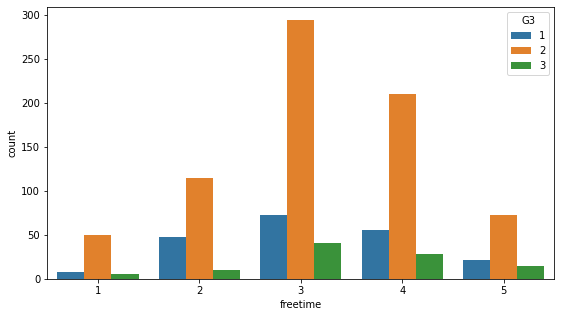

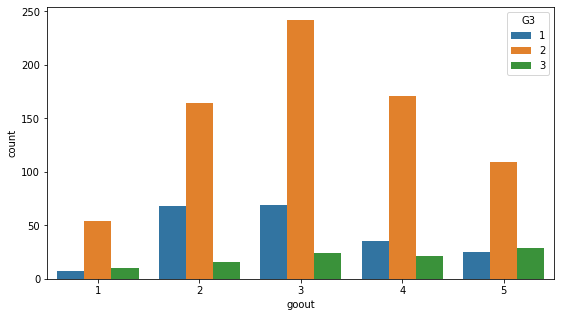

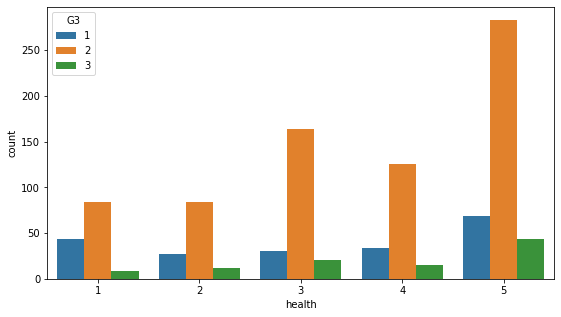

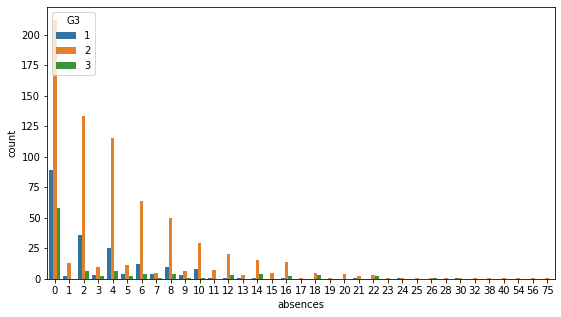

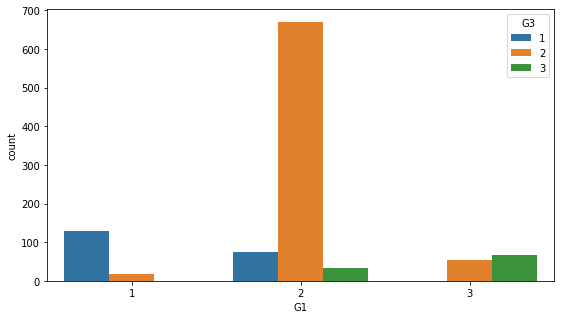

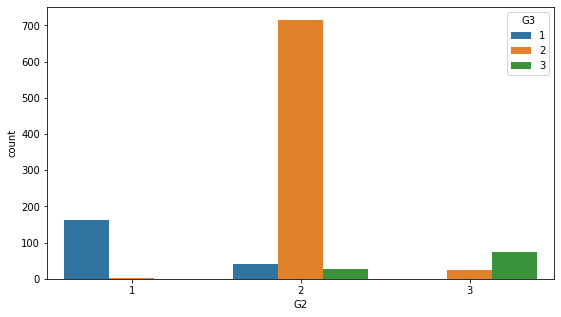

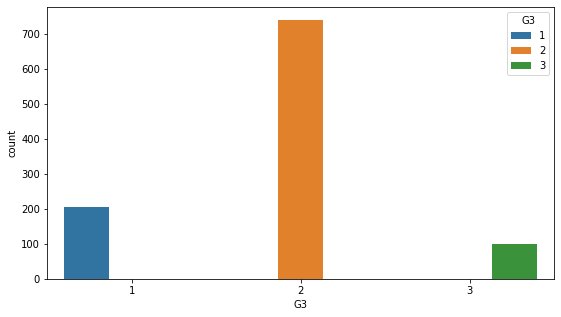

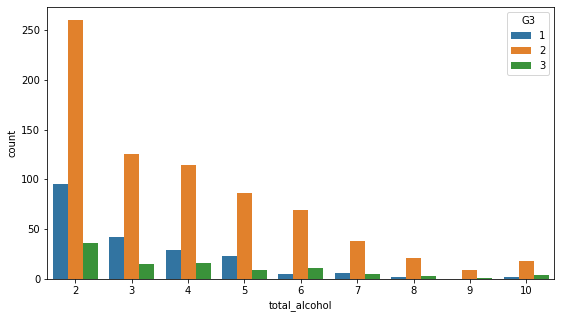

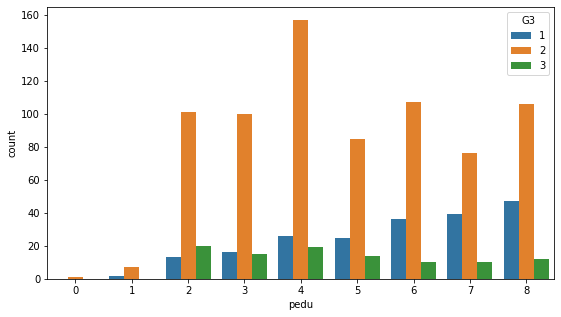

In [2]:
#reading both the maths class file and protugal files
d1 = pd.read_csv('/home/panther/Downloads/student-mat.csv')
d2 = pd.read_csv('/home/panther/Downloads/student-por.csv')

#merging both the data frames
data = pd.concat([d1, d2], ignore_index=True, sort=False)

#checking for duplicate rows
data[data.duplicated()]

#understanding columns
for i in data.columns:
    print(i)
    plt.bar(data[i].unique(),data[i].value_counts())
    plt.xlabel('unique values')
    plt.ylabel('counts')
    plt.show()

#checking columns having more than 80% single values
fx = lambda x : max(data[x].value_counts())/data.shape[0]>.80
single_value_columns = list(filter(fx,data.columns))
#droping failure from dingle value columns because it play importent role in grade
single_value_columns.remove('failures')

#checking null values 
data.isnull().sum()

#total no of days student taking alcohol 
data['total_alcohol'] = data['Walc']+data['Dalc']
data = data.drop(['Walc','Dalc'],axis=1)

data['pedu'] = data['Fedu']+data['Medu']
data = data.drop(['Fedu','Medu'],axis=1)

# checking catogorial columns 
catogrial_col =  data.columns[data.dtypes == 'object']
  
#removing G1 and G2 because we are concentarating here only G3
data.loc[data['G1'].between(0,7),'G1']= 3
data.loc[data['G1'].between(8,14),'G1']= 2
data.loc[data['G1'].between(15,20),'G1']= 1

data.loc[data['G2'].between(0,7),'G2']= 3
data.loc[data['G2'].between(8,14),'G2']= 2
data.loc[data['G2'].between(15,20),'G2']= 1


#grouping the grade into classes 
data.loc[data['G3'].between(0,7),'G3']= 3
data.loc[data['G3'].between(8,14),'G3']= 2
data.loc[data['G3'].between(15,20),'G3']= 1

#lets see how each feature is behaving with final grade
for i in data.columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.countplot(i,hue='G3',data=data)
    
    
data = pd.get_dummies(data,columns=catogrial_col)

In [3]:
#taking target feature out from the data set
y = data['G3']
X= data.drop('G3',axis=1)

#splitiing data set into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Feature selection using random forest

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.8773946360153256
precision_score = 0.8665940331571971
 
DecisionTreeClassifier - 
recall_score = 0.8467432950191571
precision_score = 0.8665940331571971
 
RandomForestClassifier - 
Precision= 0.9152417111849159
recall= 0.9157088122605364


# Feature selection using Decision tree 

In [6]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(DecisionTreeClassifier())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.8735632183908046
precision_score = 0.808588761174968
 


/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier - 
recall_score = 0.8697318007662835
precision_score = 0.808588761174968
 
RandomForestClassifier - 
Precision= 0.9221039128611116
recall= 0.9195402298850575


# Feature selection using Logistic regression

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(LogisticRegression())
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Logistic regression
model = LogisticRegression(solver='liblinear' ).fit(X_train_fs, y_train)

y_hat = model.predict(X_test_fs)

print('Logistic Regression - ')
print('recall_score =', recall_score(y_test, y_hat,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#fiting train data to model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_fs,y_train)
# Predicting the values of test data
y_pred = dtree.predict(X_test_fs)
print('DecisionTreeClassifier - ')
print('recall_score =', recall_score(y_test, y_pred,average='weighted'))
print('precision_score =',precision_score(y_test,y_hat,average='weighted'))
print(" ")

#Random forest classifier
model = RandomForestClassifier()
model.fit(X_train_fs,y_train)
predict = model.predict(X_test_fs)
print('RandomForestClassifier - ')
print('Precision=',precision_score(y_test,predict,average='weighted'))
print('recall=',recall_score(y_test,predict,average='weighted'))

Logistic Regression - 
recall_score = 0.8812260536398467
precision_score = 0.8726836791247982
 
DecisionTreeClassifier - 
recall_score = 0.8888888888888888
precision_score = 0.8726836791247982
 
RandomForestClassifier - 
Precision= 0.9032755056732316
recall= 0.9042145593869731


/home/panther/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random forest classifier model wroks better for this data using feature selection based on decision tree

# 